In [1]:
# 5DATA002W.2 Machine Learning & Data Mining
# Coursework - Python Notebook 2: Classification Modelling and Hyperparameters Tunning
# Author: Madana Madana (Ravindi Madana)

In [2]:
# This code from code reuse session 3 pt 1
# Import pandas to load classification dataset
import pandas as pd

In [3]:
# This code from code reuse session 3 pt 2
# Load the classification dataset
classification_data = pd.read_csv("/content/drive/MyDrive/ML_Coursework_w2082268/classification_dataset.csv")

In [4]:
# This code from code reuse session 3 pt 3
# Display first few rows to understand structure
classification_data.head()

Age  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0   68        0        0          1               2      3        0   
1   50        1        1          3               1      2        0   
2   58        2        2          5               1      2        0   
3   58        0        0          1               2      3        0   
4   47        1        0          2               2      3        0   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0           4                1                    1                      24   
1          35                1                    1                      14   
2          63                1                    1                      14   
3          18                1                    1                       2   
4          41                1                    1                       3   

   Regional_Node_Positive  Survival_Months  Mortality_Status  
0                       1               60                 1  
1                       5               62                 1  
2                       7               75                 1  
3                       1               84                 1  
4                       1               50                 1

In [5]:
# This code from code reuse session 3 pt 4
# Check data types
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4020 non-null   int64
 1   T_Stage                 4020 non-null   int64
 2   N_Stage                 4020 non-null   int64
 3   6th_Stage               4020 non-null   int64
 4   Differentiated          4020 non-null   int64
 5   Grade                   4020 non-null   int64
 6   A_Stage                 4020 non-null   int64
 7   Tumor_Size              4020 non-null   int64
 8   Estrogen_Status         4020 non-null   int64
 9   Progesterone_Status     4020 non-null   int64
 10  Regional_Node_Examined  4020 non-null   int64
 11  Regional_Node_Positive  4020 non-null   int64
 12  Survival_Months         4020 non-null   int64
 13  Mortality_Status        4020 non-null   int64
dtypes: int64(14)
memory usage: 439.8 KB


In [6]:
classification_data['Age'].unique()

array([68, 50, 58, 47, 51, 40, 69, 46, 65, 48, 62, 61, 56, 43, 60, 57, 55,
       63, 66, 53, 59, 54, 49, 64, 42, 37, 67, 31, 52, 33, 45, 38, 39, 36,
       41, 44, 32, 34, 35, 30, 89])

In [7]:
# This code from code reuse session 3 pt 5
# Define input features and target
feature_cols = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade',
                'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
                'Regional_Node_Examined', 'Regional_Node_Positive']
X = classification_data[feature_cols]
y = classification_data['Mortality_Status']

In [8]:
# This code from code reuse session 3 pt 6
# Import train_test_split
from sklearn.model_selection import train_test_split

In [9]:
# This code from code reuse session 3 pt 7
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# This code from code reuse session 3 pt 8
# Import VotingClassifier for ensemble
from sklearn.ensemble import VotingClassifier

In [11]:
# This code from code reuse session 3 pt 9
# Import base learners
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Define base learners
logreg = LogisticRegression()
knn = KNeighborsClassifier()
base_learners = [('LogisticRegression', logreg), ('KNN', knn)]

In [13]:
# Define soft voting ensemble
ensemble_learner = VotingClassifier(estimators=base_learners, voting='soft')

In [14]:
# This code from code reuse session 3 pt 10
# Fit the ensemble model
ensemble_learner.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

In [15]:
# This code from code reuse session 3 pt 11
# Predict on test set
y_pred_ensemble_learner = ensemble_learner.predict(X_test)

In [16]:
# This code from code reuse session 3 pt 12
# Evaluate accuracy
from sklearn.metrics import accuracy_score
ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)
print("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

The voting ensemble classifier accuracy is:  0.851575456053068


Text(0.5, 1.0, 'Ensemble Learner Confusion Matrix')

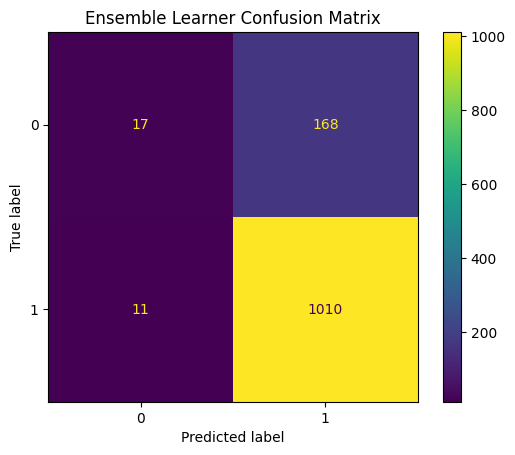

In [17]:
# This code from code reuse session 3 pt 13
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)
ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test, display_labels=ensemble_learner.classes_)
ensemble_learner_disp.plot()
ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")

In [18]:
# This code from code reuse session 3 pt 14
# Classification report
from sklearn.metrics import classification_report
print("Ensemble Learner Classification Report \n", classification_report(y_test, y_pred_ensemble_learner))

Ensemble Learner Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.09      0.16       185
           1       0.86      0.99      0.92      1021

    accuracy                           0.85      1206
   macro avg       0.73      0.54      0.54      1206
weighted avg       0.82      0.85      0.80      1206



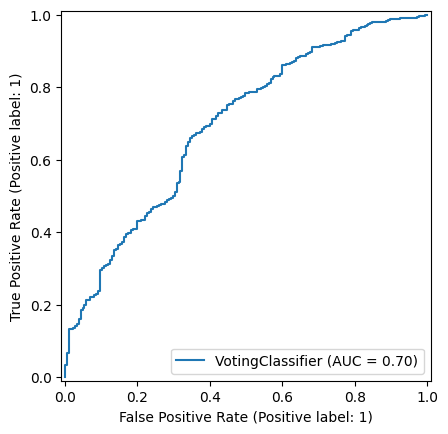

In [19]:
# This code from code reuse session 3 pt 15
# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)

In [20]:
# SURVIVAL MONTHS REGRESSION DT

In [21]:
# This code from code reuse session 3 pt 1
# Import pandas to load regression dataset
regression_data = pd.read_csv("/content/drive/MyDrive/ML_Coursework_w2082268/regression_dataset.csv")

In [22]:
# This code from code reuse session 3 pt 3
# Check data types
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     615 non-null    int64
 1   T_Stage                 615 non-null    int64
 2   N_Stage                 615 non-null    int64
 3   6th_Stage               615 non-null    int64
 4   Differentiated          615 non-null    int64
 5   Grade                   615 non-null    int64
 6   A_Stage                 615 non-null    int64
 7   Tumor_Size              615 non-null    int64
 8   Estrogen_Status         615 non-null    int64
 9   Progesterone_Status     615 non-null    int64
 10  Regional_Node_Examined  615 non-null    int64
 11  Regional_Node_Positive  615 non-null    int64
 12  Survival_Months         615 non-null    int64
 13  Mortality_Status        615 non-null    int64
dtypes: int64(14)
memory usage: 67.4 KB


In [23]:
# This code from code reuse session 3 pt 4
# Define input features and target
X = regression_data.drop('Survival_Months', axis=1)
y = regression_data['Survival_Months']

In [24]:
# This code from code reuse session 3 pt 5
# Split regression data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# This code from code reuse session 3 pt 6
# Import regression decision tree
from sklearn.tree import DecisionTreeRegressor

In [26]:
# This code from code reuse session 3 pt 7
# Train the DT model
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
# This code from code reuse session 3 pt 8
# Predict survival months
y_pred = DT_regressor.predict(X_test)

In [28]:
# This code from code reuse session 3 pt 9
# Evaluate regression model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 28.535135135135135
MSE: 1283.4324324324325
R2: -1.305029659389306


In [29]:
# This code from code reuse session 3 pt 10
# Import tree plotting tools
from sklearn import tree
from matplotlib import pyplot as plt

In [30]:
# This code from code reuse session 3 pt 11
# Plot full tree
Tree_figure = plt.figure(figsize=(200,200))
DT_Graph = tree.plot_tree(DT_regressor, feature_names=list(X_train.columns), filled=True)

In [31]:
# This code from code reuse session 3 pt 12
# Save tree graph
Tree_figure.savefig("/content/drive/MyDrive/ML_Coursework_w2082268/decision_tree.svg")

In [32]:
# This code from code reuse session 3 pt 13
# Pruned tree
DT_regressor = DecisionTreeRegressor(max_depth=4)
DT_regressor.fit(X_train, y_train)
y_pred = DT_regressor.predict(X_test)

In [33]:
# Re-evaluate pruned model
print("PRUNED TREE PERFORMANCE")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))


PRUNED TREE PERFORMANCE
MAE: 20.429760312842156
MSE: 658.1050847190666
R2: -0.18194904611951324


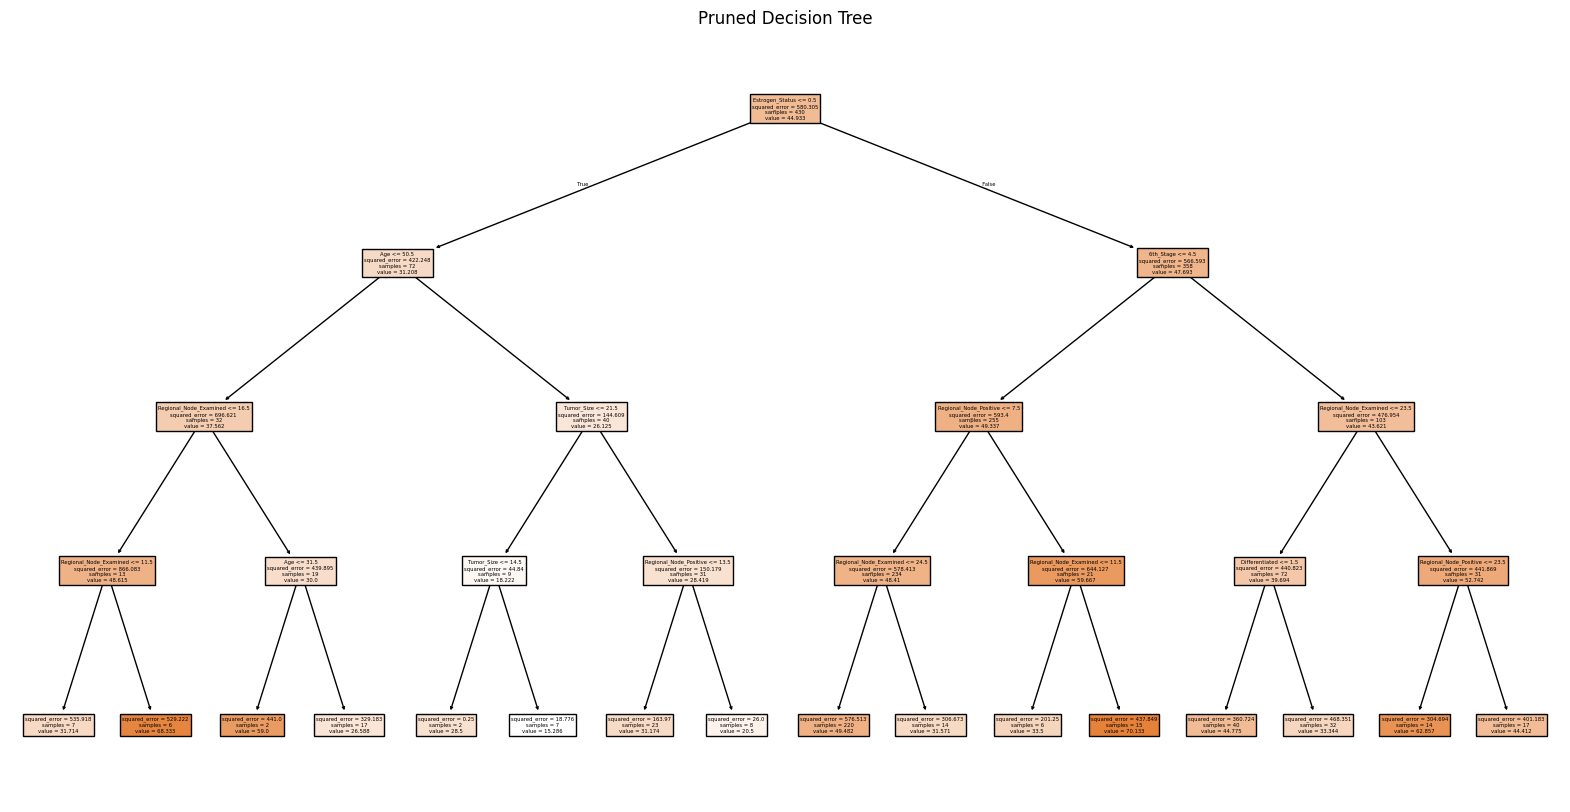

In [34]:
# Plot pruned tree
plt.figure(figsize=(20,10))
tree.plot_tree(DT_regressor, feature_names=list(X_train.columns), filled=True)
plt.title("Pruned Decision Tree")
plt.savefig("pruned_decision_tree.svg")
plt.show()

In [35]:
print(X_train.columns)
print(X_train.shape, X_test.shape)

Index(['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade',
       'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
       'Regional_Node_Examined', 'Regional_Node_Positive', 'Mortality_Status'],
      dtype='object')
(430, 13) (185, 13)


In [36]:
import pandas as pd

# Data for patient B002565
patient_data = pd.DataFrame([{
    'Age': 29,
    'T_Stage': 'T3',
    'N_Stage': 'N1',
    '6th_Stage': 'IIIC',
    'Differentiated': 'Moderately differentiated',
    'Grade': 2,
    'A_Stage': 'Regional',
    'Tumor_Size': 41,
    'Estrogen_Status': 'Negative',
    'Progesterone_Status': 'Positive',
    'Regional_Node_Examined': 5,
    'Regional_Node_Positive': 1
}])

In [37]:
# Match training data encoding
encoded_patient_data = pd.get_dummies(patient_data)
encoded_patient_data = encoded_patient_data.reindex(columns=X_train.columns, fill_value=0)

In [38]:
predicted_months = DT_regressor.predict(encoded_patient_data)
print(f"Predicted survival months for patient B002565: {predicted_months[0]}")

Predicted survival months for patient B002565: 31.714285714285715


In [39]:
import numpy as np
from sklearn.tree import _tree

def explain_prediction(model, input_data, feature_names):
    tree_ = model.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    node_indicator = model.decision_path(input_data)
    leaf_id = model.apply(input_data)

    sample_id = 0  # single sample
    print(f"Rules used to predict for patient B002565:")

    for node_id in node_indicator.indices[node_indicator.indptr[sample_id]:
                                           node_indicator.indptr[sample_id + 1]]:
        if leaf_id[sample_id] == node_id:
            continue
        threshold = tree_.threshold[node_id]
        feature = feature_name[node_id]
        if input_data.iloc[sample_id, tree_.feature[node_id]] <= threshold:
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        print(f"  - {feature} (value: {input_data.iloc[sample_id, tree_.feature[node_id]]}) "
              f"{threshold_sign} {threshold:.2f}")

In [40]:
explain_prediction(DT_regressor, encoded_patient_data, X_train.columns)

Rules used to predict for patient B002565:
  - Estrogen_Status (value: 0) <= 0.50
  - Age (value: 29) <= 50.50
  - Regional_Node_Examined (value: 5) <= 16.50
  - Regional_Node_Examined (value: 5) <= 11.50
